/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_39566/1376790189.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


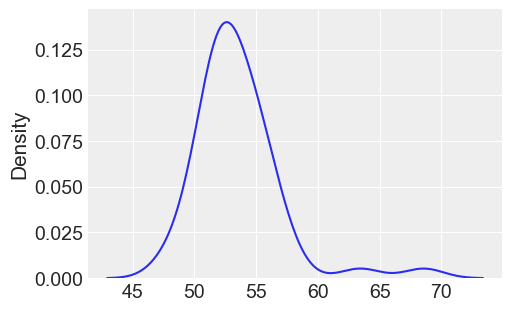

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc as pm
import arviz as az
import pandas as pd 
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
az.style.use("arviz-darkgrid")
pd.set_option("display.precision", 2)
rng = np.random.default_rng(42)

data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 
    55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 
    57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94,
    54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84,
    53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16
])

plt.figure(figsize=(5,3))
sns.kdeplot(data)
plt.savefig("img302.png")

In [2]:
with pm.Model() as model_g:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sigma=10)
    # y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    idata = pm.sample_prior_predictive(samples=100, random_seed=rng)

    # step = pm.Slice()
    trace_g = pm.sample(1100)
    # chain_g = trace_g[100:]

# chain_g = trace_g[1]
# pm.traceplot(chain_g)

Sampling: [mu, sigma, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_100 draw iterations (4_000 + 4_400 draws total) took 1 seconds.


In [3]:
# plt.figure(figsize=(5,3))
# az.plot_posterior(trace_g)
# az.plot_forest(trace_g, r_hat=True)

In [4]:
df = pm.summary(trace_g)   # az.summary(trace_g)でも可
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.51,0.52,52.48,54.42,8.00e-03,6.00e-03,4320.0,2913.0,1.0
sigma,3.55,0.38,2.91,4.33,6.00e-03,4.00e-03,4124.0,3068.0,1.0


Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 30 tune and 300 draw iterations (120 + 1_200 draws total) took 0 seconds.


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

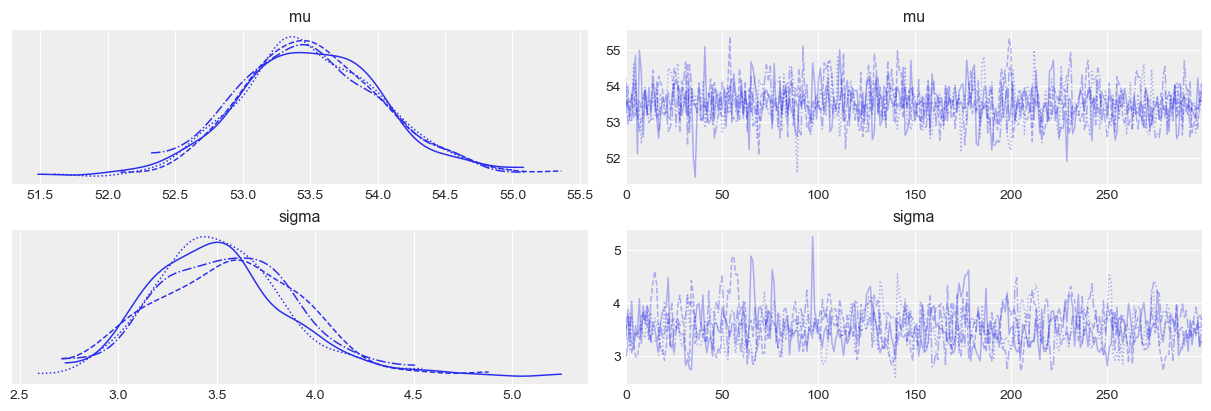

In [5]:
with model_g:
    idata.extend(pm.sample(300, tune=30, random_seed=rng))

az.plot_trace(idata)

In [6]:
with model_g:
    pm.sample_posterior_predictive(idata, 
                                   extend_inferencedata=True,
                                   random_seed=rng,
                                #    var_names=["mu", "sigma"],
                                   )
# az.plot_ppc(az.from_pymc3(posterior_predictive=y_pred, model=model_g))
# print(y_pred["posterior_predictive"]["mu"].shape)
# print(y_pred.keys())
idata.posterior_predictive

Sampling: [y]


<xarray.Dataset>
Dimensions:  (chain: 4, draw: 300, y_dim_2: 48)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * y_dim_2  (y_dim_2) int64 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47
Data variables:
    y        (chain, draw, y_dim_2) float64 53.66 58.41 53.28 ... 56.47 55.8
Attributes:
    created_at:                 2022-12-04T03:26:09.961884
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  4.4.0

array([<AxesSubplot: xlabel='y / y', ylabel='Density'>], dtype=object)

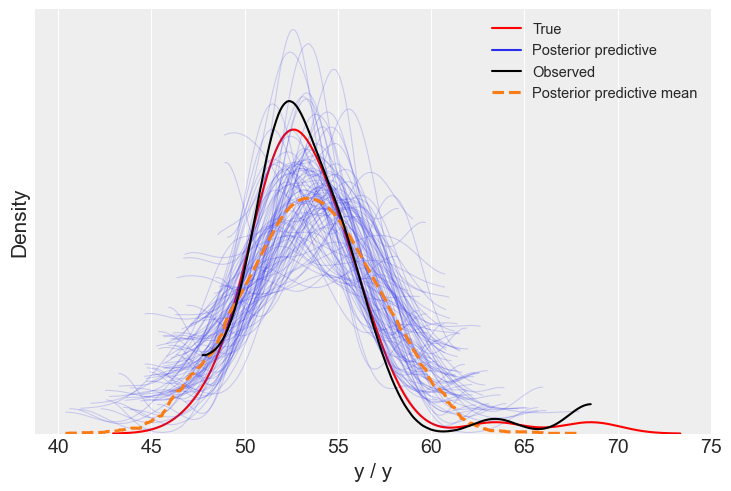

In [7]:
fig, ax = plt.subplots()
sns.kdeplot(data, c="r", ax=ax, label="True")
az.plot_ppc(idata, num_pp_samples=100, ax=ax)

In [8]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

0.929159959066595

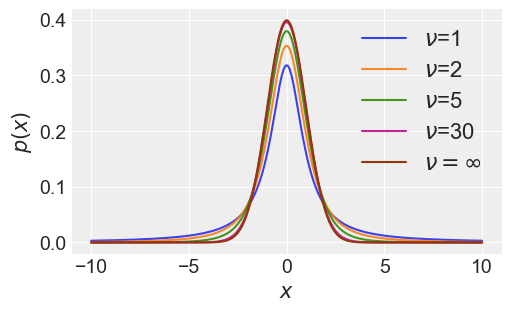

In [9]:
plt.figure(figsize=(5,3))
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, 
             label=r"$\nu$={}".format(df),
             alpha=0.9)

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu=\infty$')
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(loc=0, fontsize=16)

### t分布を含むモデルのKDEとトレースプロット


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 4 chains for 100 tune and 1_100 draw iterations (400 + 4_400 draws total) took 1 seconds.
Sampling: [mu, nu, sigma, y]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.01,0.39,52.31,53.74,7.00e-03,5.00e-03,3607.0,2802.0,1.00
sigma,2.21,0.40,1.53,2.99,1.30e-02,1.00e-02,1010.0,1021.0,1.00
nu,5.03,6.17,1.10,9.87,3.21e-01,2.27e-01,564.0,477.0,1.01


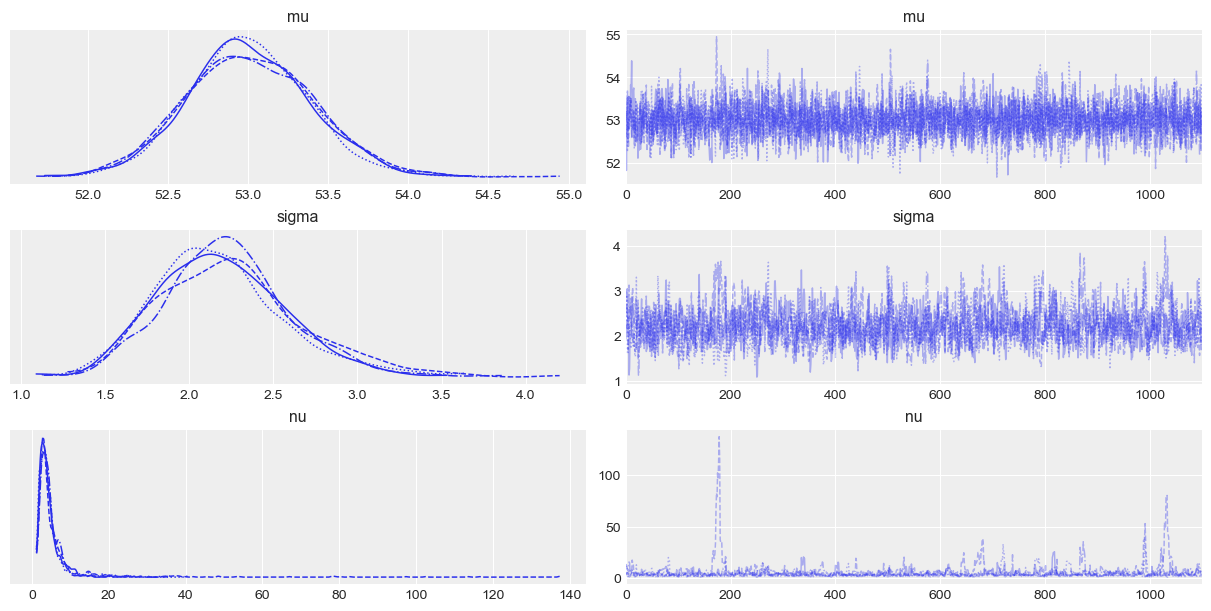

In [10]:
nburn=100
with pm.Model() as model_t:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sigma=10)
    nu = pm.Exponential("nu", 1/30)
    y = pm.StudentT("y", mu=mu, sigma=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100, tune=nburn, discard_tuned_samples=True)
    idata = pm.sample_prior_predictive(samples=100, random_seed=rng)

az.plot_trace(trace_t)
pm.summary(trace_t)

### データのKDEと100組の事後予測サンプルのKDE


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 0 seconds.


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>],
       [<AxesSubplot: title={'center': 'nu'}>,
        <AxesSubplot: title={'center': 'nu'}>]], dtype=object)

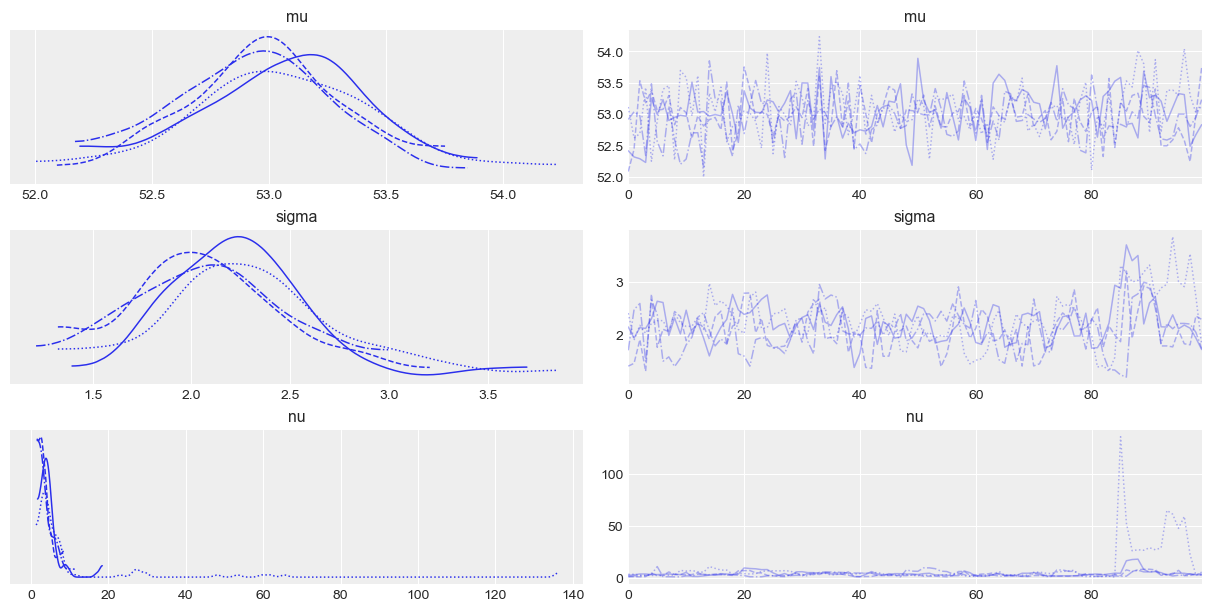

In [11]:
with model_t:
    idata.extend(pm.sample(100, tune=100, random_seed=rng))

az.plot_trace(idata)

In [12]:
with model_t:
    pm.sample_posterior_predictive(idata, 
                                   extend_inferencedata=True,
                                   random_seed=rng,
                                   # var_names=["mu", "sigma", "nu"],
                                   )
idata.posterior_predictive

Sampling: [y]


<xarray.Dataset>
Dimensions:  (chain: 4, draw: 100, y_dim_2: 48)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * y_dim_2  (y_dim_2) int64 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47
Data variables:
    y        (chain, draw, y_dim_2) float64 51.89 50.78 54.79 ... 52.25 52.82
Attributes:
    created_at:                 2022-12-04T03:26:17.624418
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  4.4.0

array([<AxesSubplot: xlabel='y / y', ylabel='Density'>], dtype=object)

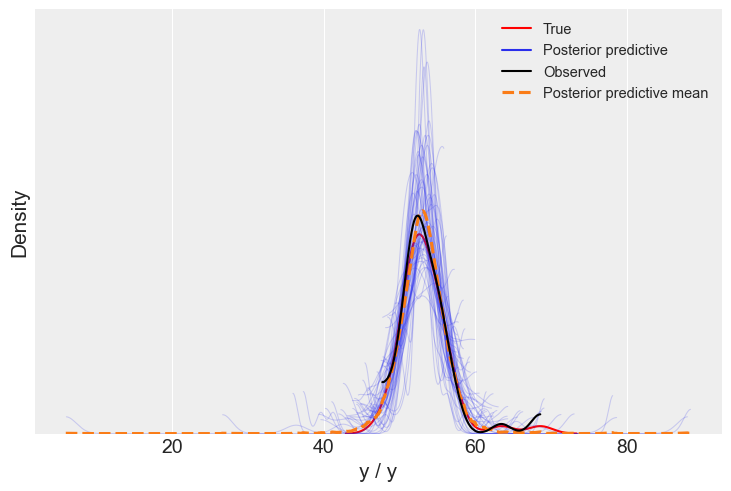

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(data, c="r", ax=ax, label="True")
az.plot_ppc(idata, num_pp_samples=60, ax=ax)